In [22]:
# 1. Import basic libraries
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

#from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
df = pd.read_csv('/content/drive/My Drive/Dataset/Fifa 23 Players Data.csv' , sep = ',')
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


**Data Exploration**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [25]:
# 2. Describe overall
df.describe().round(decimals=0)

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,...,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0
mean,66.0,71.0,2875461.0,25.0,182.0,75.0,1602.0,358.0,8825.0,5081688.0,...,58.0,57.0,58.0,56.0,56.0,56.0,56.0,55.0,56.0,23.0
std,7.0,6.0,7635129.0,5.0,7.0,7.0,273.0,40.0,19461.0,14672035.0,...,14.0,13.0,14.0,14.0,14.0,14.0,14.0,15.0,14.0,15.0
min,47.0,48.0,0.0,16.0,155.0,49.0,759.0,224.0,0.0,0.0,...,18.0,18.0,18.0,17.0,19.0,17.0,17.0,18.0,17.0,10.0
25%,62.0,67.0,475000.0,21.0,177.0,70.0,1470.0,331.0,1000.0,665000.0,...,54.0,53.0,54.0,51.0,48.0,51.0,49.0,45.0,49.0,17.0
50%,66.0,71.0,1000000.0,25.0,182.0,75.0,1640.0,358.0,3000.0,1500000.0,...,62.0,60.0,62.0,59.0,59.0,59.0,59.0,58.0,59.0,18.0
75%,70.0,75.0,2000000.0,29.0,186.0,80.0,1786.0,385.0,8000.0,3400000.0,...,67.0,66.0,67.0,66.0,66.0,66.0,65.0,66.0,65.0,20.0
max,91.0,95.0,190500000.0,44.0,206.0,105.0,2312.0,502.0,450000.0,366700000.0,...,92.0,91.0,92.0,88.0,89.0,88.0,87.0,90.0,87.0,90.0


In [26]:
# 3. Checking the shape of Data Frame
df.shape

(18539, 89)

In [27]:
# 4. Check whether the is any null values
print(df.isnull().sum())
print(f'Total null value count:{df.isnull().sum().sum()}')

Known As          0
Full Name         0
Overall           0
Potential         0
Value(in Euro)    0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 89, dtype: int64
Total null value count:0


In [28]:
df.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

I will look more specific into Nationality feature

In [29]:
# 5. Looking into Nationality feature
print(f'Nationality feature has {df["Nationality"].nunique()} unique values')

Nationality feature has 160 unique values


In [30]:
# 6. Count value per Nationality
df_nationality_counts = df["Nationality"].value_counts()
df_nationality_counts

England          1632
Germany          1204
Spain            1074
France            963
Argentina         937
                 ... 
Bermuda             1
Kazakhstan          1
Liechtenstein       1
Korea DPR           1
Barbados            1
Name: Nationality, Length: 160, dtype: int64

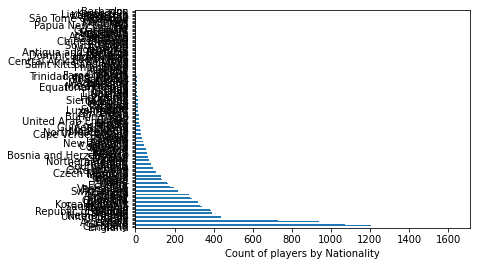

In [31]:

# 7. Plot the count of players
df_nationality_counts.plot(kind="barh")
plt.xlabel("Count of players by Nationality");

In [32]:
def country(x):
    return df[df['Nationality'] == x].head()


# prepare dataset for Indian players
country('India')

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
10730,S. Chhetri,Sunil Chhetri,65,65,230000,"LW,ST",ST,India,https://cdn.sofifa.net/players/190/939/23_60.png,37,...,65,60,65,55,50,55,53,48,53,17
11489,S. Jhingan,Sandesh Jhingan,64,65,550000,CB,CB,India,https://cdn.sofifa.net/players/223/763/23_60.png,28,...,45,47,45,57,59,57,59,65,59,18
12005,G. Singh Sandhu,Gurpreet Singh Sandhu,63,64,350000,GK,GK,India,https://cdn.sofifa.net/players/225/213/23_60.png,30,...,29,30,29,29,30,29,28,29,28,64
13254,A. Thapa,Anirudh Thapa,62,68,625000,"CM,CDM",CM,India,https://cdn.sofifa.net/players/245/170/23_60.png,24,...,64,64,64,64,63,64,62,57,62,19
13765,S. Abdul Samad,Sahal Abdul Samad,62,65,525000,"RM,LM,CAM",CAM,India,https://cdn.sofifa.net/players/247/630/23_60.png,25,...,63,62,63,58,59,58,57,54,57,16


**Data Visualization**

In [33]:
df['Preferred Foot'].value_counts()

Right    14045
Left      4494
Name: Preferred Foot, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


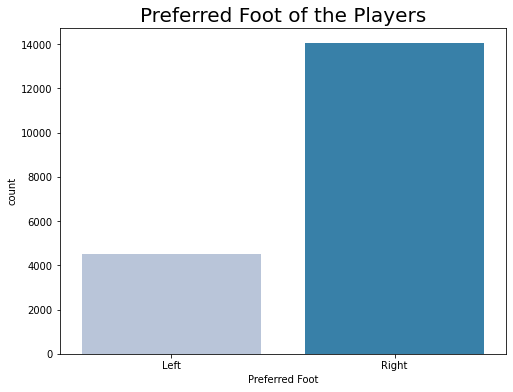

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(df['Preferred Foot'], palette = 'PuBu')
plt.title('Preferred Foot of the Players', fontsize = 20)
plt.show()

The above countplot is great but it does not show up the exact number of players on top of the bar. To show the exact numbers we can proceed as follows-


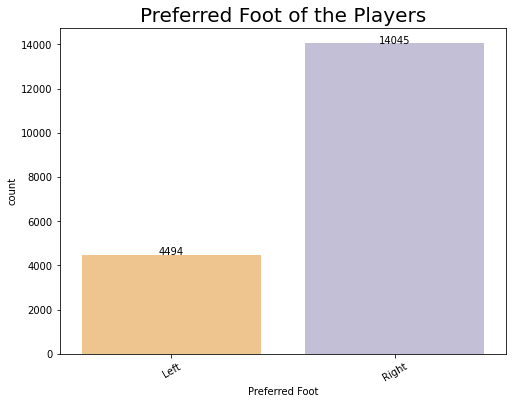

In [41]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=df['Preferred Foot'], data=df, palette = 'PuOr')
graph.set_title('Preferred Foot of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

Now the above countplots are great but they do not show up the exact percentages of players. We can show the exact percentages of players as follows-

In [42]:
df['Preferred Foot'].value_counts()/len(df)


Right    0.757592
Left     0.242408
Name: Preferred Foot, dtype: float64

We can use a pie chart to visualize the exact percentages.

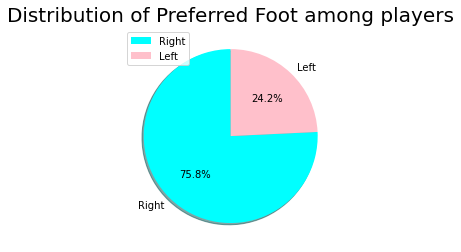

In [43]:
labels = df['Preferred Foot'].value_counts().index
size = df['Preferred Foot'].value_counts()
colors=['cyan','pink']
plt.pie(size, labels = labels, colors = colors, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Preferred Foot among players', fontsize = 20)
plt.legend()
plt.show()

**Distribution of weak foot**

Q. What is the distribution of weak foot ?

A. The distribution of weak foot can be obtained as follows -


In [50]:
df['Weak Foot Rating'].value_counts()


3    11480
2     3933
4     2656
5      306
1      164
Name: Weak Foot Rating, dtype: int64

We can visualize distribution of Weak foot as follows -

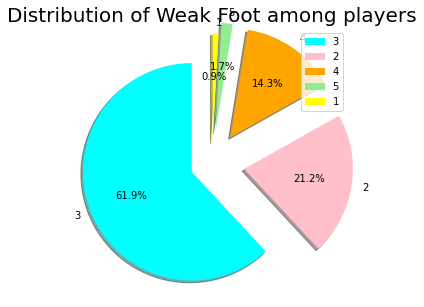

In [58]:
plt. figure(figsize=(8,5))
labels = df['Weak Foot Rating'].value_counts().index
size = df['Weak Foot Rating'].value_counts()
colors=['cyan','pink','orange','lightgreen','yellow']
explode = [0.2, 0.3, 0.3, 0.3, 0.2]
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Weak Foot among players', fontsize = 20)
plt.legend()
plt.show()


**Age distribution of players**

Q. How can we visualize the age distribution of players.

A. We can use a histogram to visualize the age distribution of players.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


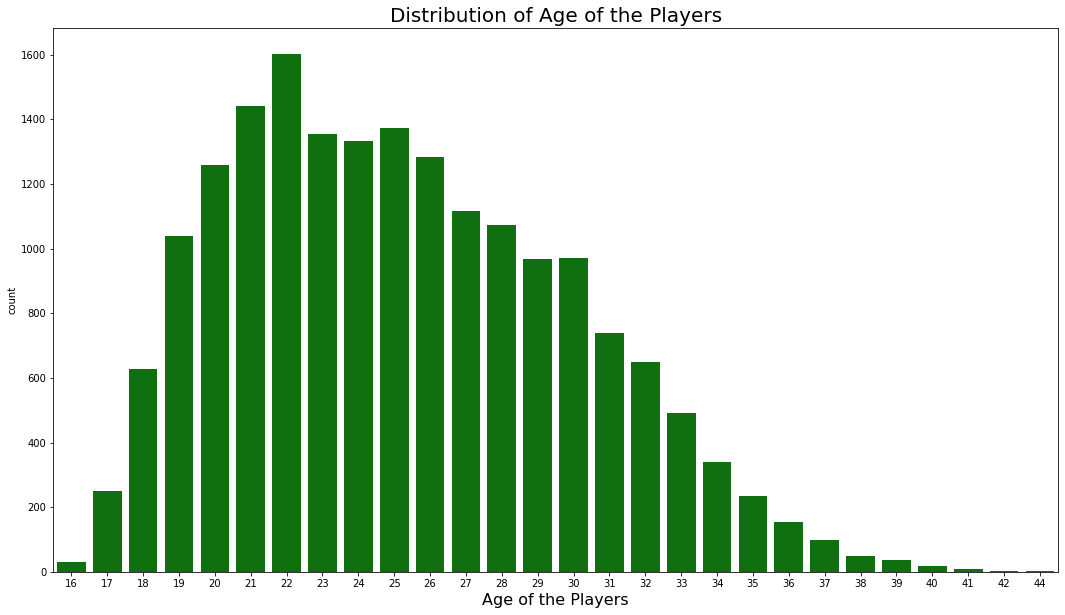

In [59]:
x = df['Age']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Distribution of Age of the Players', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


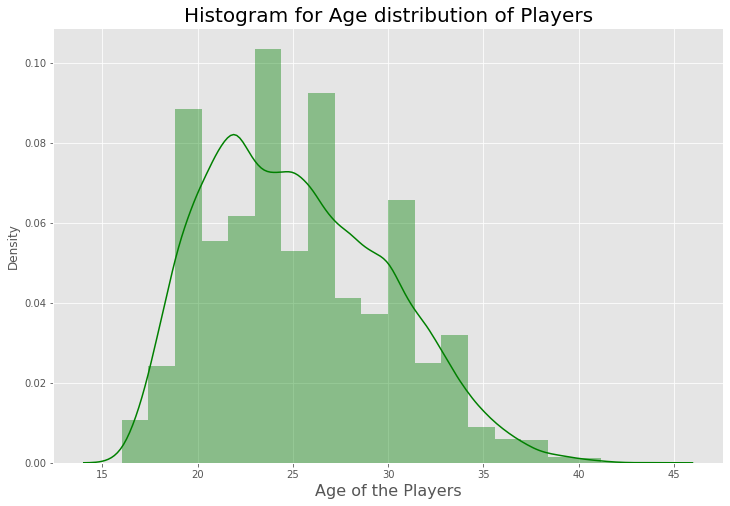

In [60]:
x = df['Age']
plt.figure(figsize = (12, 8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 20, kde = True, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Histogram for Age distribution of Players', fontsize = 20)
plt.show()

**Visualize International Reputation**

Q. How can we track international reputation of players.

A. We can track international reputation of players as follows -

In [61]:
df['International Reputation'].value_counts()

1    17325
2      897
3      255
4       55
5        7
Name: International Reputation, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


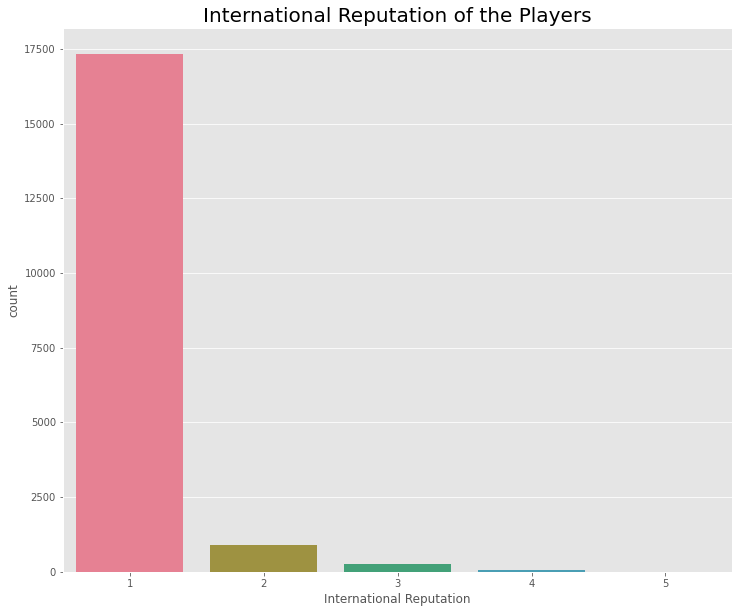

In [62]:
plt.figure(figsize=(12,10))
sns.countplot(df['International Reputation'], palette = 'husl')
plt.title('International Reputation of the Players', fontsize = 20)
plt.show()


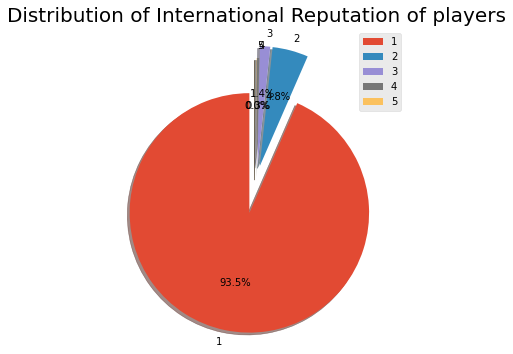

In [72]:
plt. figure(figsize=(8,5))
labels = df['International Reputation'].value_counts().index
size = df['International Reputation'].value_counts()
explode = [0.3, 0.1, 0.1, 0, 0]
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of International Reputation of players', fontsize = 20)
plt.legend()
plt.tight_layout()
plt.show()


Q. What is the international reputation of left and right footed players?

A. The international reputation of left and right footed players can be given as follows -

In [73]:
df.groupby('Preferred Foot')['International Reputation'].value_counts()

Preferred Foot  International Reputation
Left            1                            4207
                2                             205
                3                              69
                4                              12
                5                               1
Right           1                           13118
                2                             692
                3                             186
                4                              43
                5                               6
Name: International Reputation, dtype: int64

In [74]:
plt.figure(figsize=(12,10))
sns.countplot(df['International Reputation'], hue=df['Preferred Foot'], palette = 'husl')
plt.title('International Reputation of Left and Right Footed Players ', fontsize = 20)
plt.show()

Work Rate of the Players
Q. What is the different work rate of the players?

A. The different work rate of the players can be given as follows -

In [77]:
df['Defensive Work Rate'].value_counts()

Medium    13613
High       3377
Low        1549
Name: Defensive Work Rate, dtype: int64

We can visualize the work rate of the players as follows -

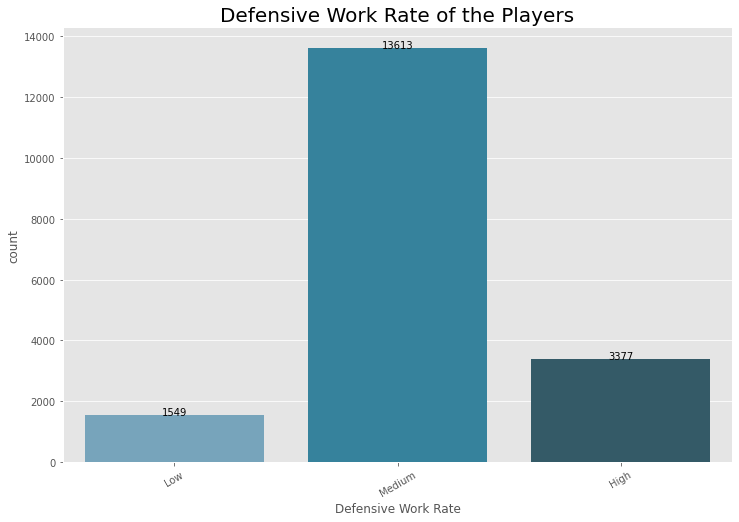

In [78]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Defensive Work Rate'], data=df, palette = 'PuBuGn_d')
graph.set_title('Defensive Work Rate of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

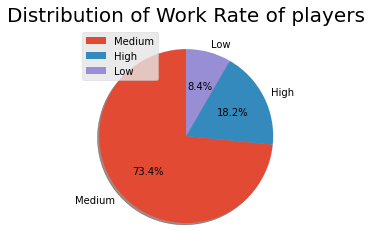

In [83]:
labels = df['Defensive Work Rate'].value_counts().index
size = df['Defensive Work Rate'].value_counts()
explode = [0,0,0]
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Work Rate of players', fontsize = 20)
plt.legend()
plt.show()

**Skill Moves of the Players**

Q. What is the different skill moves of the players?

A. The different work rate of the players can be given as follows -

In [84]:
df['Skill Moves'].value_counts()

2    8895
3    6369
1    2061
4    1162
5      52
Name: Skill Moves, dtype: int64

We can visualize the skill moves of the players as follows-

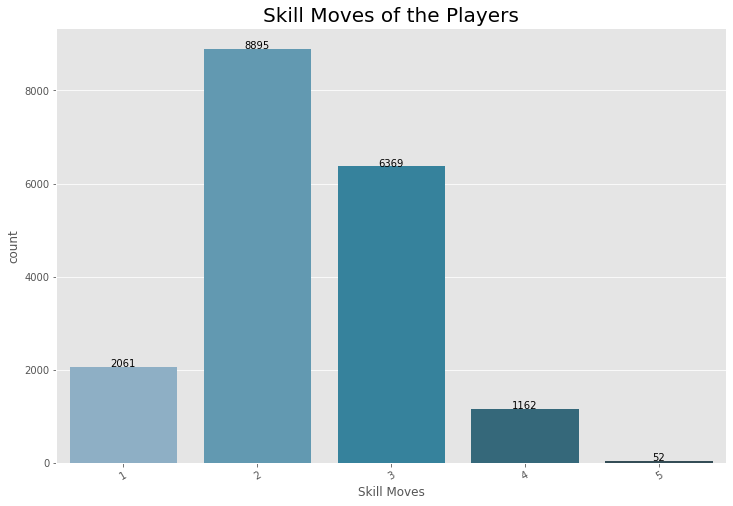

In [85]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, palette = 'PuBuGn_d')
graph.set_title('Skill Moves of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

**Analyse players based on club**

In [88]:
df['Club Name'].nunique()

679

In [89]:
df['Club Name'].unique()

array(['Paris Saint-Germain', 'Real Madrid CF', 'FC Barcelona',
       'Manchester City', 'Liverpool', 'FC Bayern München',
       'Manchester United', 'Tottenham Hotspur', 'Atlético de Madrid',
       'Chelsea', 'AC Milan', 'Lazio', 'Inter', 'Roma', 'Juventus',
       'Eintracht Frankfurt', 'Villarreal CF', 'RB Leipzig',
       'Borussia Dortmund', 'Real Betis Balompié', 'RC Celta de Vigo',
       'Sevilla FC', 'Leicester City', 'Bayer 04 Leverkusen',
       'Borussia Mönchengladbach', 'Galatasaray SK',
       'Club Nacional de Football', 'Ajax', 'U.S. Sassuolo Calcio',
       'Arsenal', 'Aston Villa', 'AS Monaco', 'Toronto FC',
       'VfL Wolfsburg', 'Athletic Club de Bilbao', 'Newcastle United',
       'Los Angeles FC', 'AFC Richmond', 'West Ham United',
       'Real Sociedad', 'TSG Hoffenheim', 'Wolverhampton Wanderers',
       'Palmeiras', 'Napoli', 'PSV', 'Atalanta', 'OGC Nice', 'SL Benfica',
       'Getafe CF', 'Al Nassr', 'Valencia CF', 'FC Porto',
       'Sport-Club Freiburg'

In [90]:
clubs = ['FC Barcelona','Real Madrid','Juventus','Liverpool','Manchester United',
         'Chelsea','Arsenal','Paris Saint-Germain' ,'FC Bayern München','Manchester']

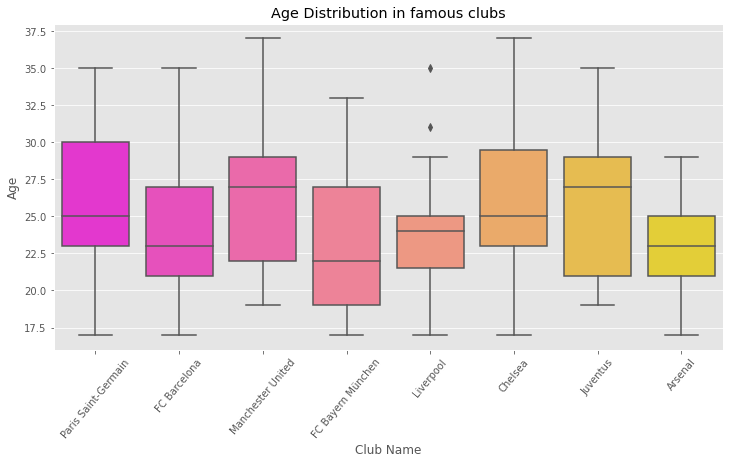

In [93]:
df_club_age = df.loc[df['Club Name'].isin(clubs) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club Name', y = 'Age' , data = df_club_age, palette='spring')
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

So, Juventus has the eldest set of players and Real Madrid and Liverpool has youngest set of players

**Overall Rating in famous clubs**

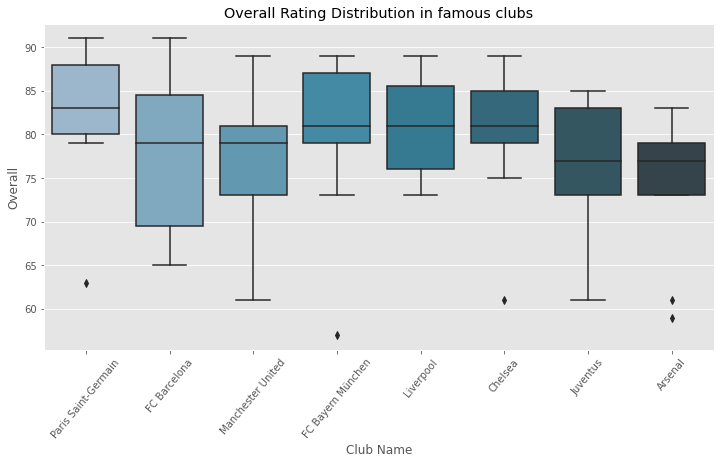

In [95]:
df_club_rating = df.loc[df['Club Name'].isin(clubs) & df['Overall']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club Name' , y = 'Overall' , data = df_club_rating, palette='PuBuGn_d')
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

So, Juventus has the best rating of the players.

**Profiling top players**

The Best Players
Q. Who are the 10 best players?

A. The 10 best players are-

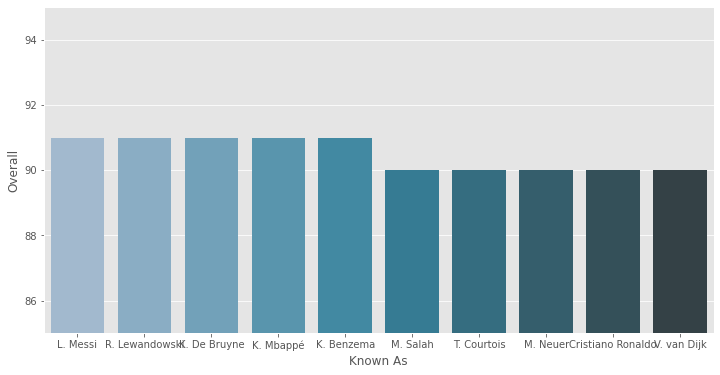

In [100]:
df_best_players = pd.DataFrame.copy(df.sort_values(by ='Overall',ascending = False ).head(10))
plt.figure(1,figsize = (12,6))
sns.barplot(x ='Known As' , y = 'Overall' , data = df_best_players, palette='PuBuGn_d')
plt.ylim(85,95)
plt.show()

# **Data Analysis**

**The Eldest Players**

In [106]:

df.sort_values(by = 'Age' , ascending = False)[['Known As','Club Name','Nationality','Overall', 'Age' ]].head()

,Known As,Club Name,Nationality,Overall,Age
592,G. Buffon,Parma,Italy,79,44
13548,S. Lukić,Varbergs BoIS FC,Bosnia and Herzegovina,62,42
3276,S. Torrico,San Lorenzo de Almagro,Argentina,72,42
15525,J. Szmatuła,Piast Gliwice,Poland,59,41
10851,M. Galezo,Hermanos Colmenarez,Venezuela,64,41


**The Youngest Players**

In [108]:
df.sort_values(by = 'Age' , ascending = True)[['Known As','Club Name','Nationality','Overall', 'Age' ]].head()

,Known As,Club Name,Nationality,Overall,Age
17956,A. Dithmer,F.C. København,Denmark,53,16
18014,J. Ardila,Estudiantes de Mérida,Venezuela,53,16
16084,S. Ngoma,New York Red Bulls,United States,58,16
11481,O. Vargas,Seattle Sounders FC,United States,64,16
17591,A. Madaliński,Miedź Legnica,Poland,54,16


**The Best Freekick Takers**

In [112]:
df.sort_values(by = 'Freekick Accuracy' , ascending = False)[['Known As','Club Name','Nationality','Age','Freekick Accuracy']].head()

,Known As,Club Name,Nationality,Age,Freekick Accuracy
345,J. Ward-Prowse,Southampton,England,27,94
0,L. Messi,Paris Saint-Germain,Argentina,35,93
127,J. Tartt,AFC Richmond,England,24,90
54,Parejo,Villarreal CF,Spain,33,90
649,L. Zelarayán,Columbus Crew,Armenia,30,89


**The Best Penalty Kick Taker**

In [114]:
df.sort_values(by = 'Penalties' , ascending = False)[['Known As','Club Name','Nationality','Age']]

,Known As,Club Name,Nationality,Age
239,R. Jiménez,Wolverhampton Wanderers,Mexico,31
10,H. Kane,Tottenham Hotspur,England,28
968,M. Balotelli,FC Sion,Italy,31
11,Neymar Jr,Paris Saint-Germain,Brazil,30
459,M. Kruse,VfL Wolfsburg,Germany,34
...,...,...,...,...
13433,M. Arzamendia,Club Olimpia,Paraguay,24
17274,J. Walsh,Queens Park Rangers,England,20
12037,B. Voll,Viktoria Köln,Germany,21
12535,A. Maynard-Brewer,Gillingham,Australia,23


**Fastest Players**


In [120]:
df.sort_values(by = 'Sprint Speed' , ascending = False)[['Known As','Club Name','Nationality','Overall', 'Age','Sprint Speed']].head()

,Known As,Club Name,Nationality,Overall,Age,Sprint Speed
4,K. Mbappé,Paris Saint-Germain,France,91,23,97
1283,J. St. Juste,Sporting CP,Netherlands,76,25,96
651,Adama Traoré,Wolverhampton Wanderers,Spain,79,26,96
10327,S. Conteh,SC Paderborn 07,Germany,65,25,96
63,Vinícius Jr.,Real Madrid CF,Brazil,86,21,95


**The Best Finisher**


In [115]:
df.sort_values(by = 'Finishing' , ascending = False)[['Known As','Club Name','Nationality','Overall', 'Age','Finishing']].head()

,Known As,Club Name,Nationality,Overall,Age,Finishing
2,R. Lewandowski,FC Barcelona,Poland,91,33,94
21,E. Haaland,Manchester City,Norway,88,21,94
8,Cristiano Ronaldo,Manchester United,Portugal,90,37,93
4,K. Mbappé,Paris Saint-Germain,France,91,23,93
5,M. Salah,Liverpool,Egypt,90,30,93
